In [2]:
!pip3 install -r requirements.txt

  Obtaining dependency information for pillow>=7.0.0 from https://files.pythonhosted.org/packages/b7/ad/71982d18fd28ed1f93c31b8648f980ebdbdbcf7d8c9c9b4af59290914ce9/Pillow-10.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for requests>=2.20.0 from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python>=4.2.0.32 from https://files.pythonhosted.org/packages/32/a6/4321f0f30ee11d6d85f49251d417f4e885fe7638b5ac50b7e3c80cccf141/opencv_python-4.8.0.76-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Using cached opencv_python-4.8.0.76-cp37-abi3-macosx_11_0_arm64.whl.metadata (19 kB)
  Obtaining dependency information for tqdm>=4.23.0 from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
df = pd.read_csv('GPTNameTHEN.txt', sep=".", header=None, index_col=0)

In [3]:
df.columns = ["Name"]

In [4]:
import regex as re
def en_th_sep(name = 'name'):
    name = name.split('(')
    name[1] = name[1].replace(')', '')
    if re.search(r'[ก-๙]', name[0]):
        return name[1], name[0]
    else:
        return name[0], name[1]

In [5]:
df['en'], df['th'] = zip(*df['Name'].map(en_th_sep))

In [6]:
df = df.drop(columns=['Name'])
df.head()

,en,th
0,,
1,Somchai Jai Dee,สมชาย ใจดี
2,Rungtiwa Suayngam,รุ่งทิวา สวยงาม
3,Patharaporn Rukchat,ภัทราพร รักชาติ
4,Orawan Mee-rak,อรวรรณ มีรักษ์
5,Nattawan Sukjai,ณัฐวรรณ สุขใจ


Missing modules for handwritten text generation.
นั่น


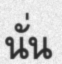

น่ัน


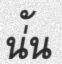

พี่


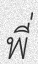

พ่ี


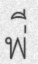

น้ำ


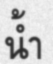

นำ้


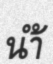

In [1]:
from trdg.generators import (
    GeneratorFromStrings )

# The generators use the same arguments as the CLI, only as parameters
generator = GeneratorFromStrings(
    # df['th'].tolist(),
    ['นั่น', 'น่ัน', 'พี่', 'พ่ี', 'น้ำ', 'นำ้'],
    blur=1,
    random_blur=True,
    language='th',
    count=6,
    fonts=[
        'trdg/fonts/th/upcdb.ttf', 'trdg/fonts/th/upcdbi.ttf',
        'trdg/fonts/th/upcdi.ttf', 'trdg/fonts/th/upcdl.ttf'
    ],
    size=64,
    margins=(5, 5, 5, 5),
    
)

for img, lbl in generator:
    print(lbl)
    display(img)

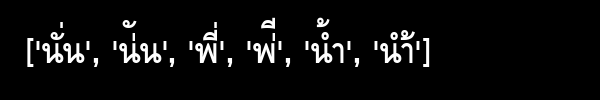

In [1]:
from PIL import Image, ImageFont, ImageDraw

text_string = str(['นั่น', 'น่ัน', 'พี่', 'พ่ี', 'น้ำ', 'นำ้'])

img = Image.new('RGB', (600, 100))
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('trdg/fonts/th/upcdb.ttf', 50, layout_engine=ImageFont.Layout.RAQM)

draw.text((25,40), text_string, fill='white', font=font)

display(img)